In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
file_path = "/content/drive/MyDrive/crt/ELCGRU.csv"
df = pd.read_csv(file_path)
df


,Date,Price
0,15/12/2023,18800.0
1,14/12/2023,19150.0
2,13/12/2023,18900.0
3,12/12/2023,19350.0
4,11/12/2023,19350.0
...,...,...
1744,21/12/2016,19855.5
1745,20/12/2016,20076.9
1746,19/12/2016,20298.3
1747,16/12/2016,20298.3


Ratio 7-3

In [ ]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test theo tỉ lệ 8:2
df = df[['Price']]
df=df.dropna()
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7* len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]


In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[-4070.09309309 -4083.80344693 -4097.51380076 -4111.2241546
 -4124.93450843 -4138.64486227 -4152.35521611 -4166.06556994
 -4179.77592378 -4193.48627761 -4207.19663145 -4220.90698529
 -4234.61733912 -4248.32769296 -4262.03804679 -4275.74840063
 -4289.45875447 -4303.1691083  -4316.87946214 -4330.58981597
 -4344.30016981 -4358.01052365 -4371.72087748 -4385.43123132
 -4399.14158515 -4412.85193899 -4426.56229283 -4440.27264666
 -4453.9830005  -4467.69335433]


In [ ]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:",test_mae)


Testing RMSE: 14151.727084308619
MAPE: 96.97153170547294
Testing MAE: 12608.925544311081


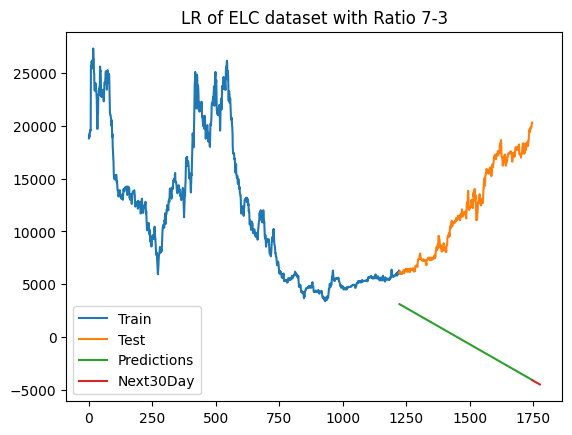

In [ ]:

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('LR of ELC dataset with Ratio 7-3')
plt.show()

Ratio 8-2

In [ ]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test theo tỉ lệ 8:2
df = df[['Price']]
df=df.dropna()
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8* len(df))
test_size = int(0.2* len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[ -774.42738038  -785.6227824   -796.81818443  -808.01358646
  -819.20898848  -830.40439051  -841.59979253  -852.79519456
  -863.99059658  -875.18599861  -886.38140063  -897.57680266
  -908.77220468  -919.96760671  -931.16300873  -942.35841076
  -953.55381278  -964.74921481  -975.94461684  -987.14001886
  -998.33542089 -1009.53082291 -1020.72622494 -1031.92162696
 -1043.11702899 -1054.31243101 -1065.50783304 -1076.70323506
 -1087.89863709 -1099.09403911]


In [ ]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:",test_mae)

Testing RMSE: 14097.246774035972
MAPE: 89.59919905563828
Testing MAE: 13452.923156867198


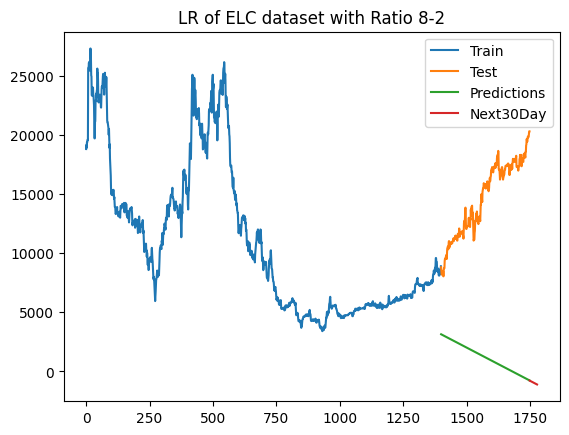

In [ ]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('LR of ELC dataset with Ratio 8-2')
plt.show()

Ratio 9-1

In [ ]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test theo tỉ lệ 8:2
df = df[['Price']]
df=df.dropna()
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.9* len(df))
test_size = int(0.1* len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[3888.51027092 3881.03643523 3873.56259953 3866.08876384 3858.61492814
 3851.14109244 3843.66725675 3836.19342105 3828.71958536 3821.24574966
 3813.77191396 3806.29807827 3798.82424257 3791.35040688 3783.87657118
 3776.40273548 3768.92889979 3761.45506409 3753.9812284  3746.5073927
 3739.033557   3731.55972131 3724.08588561 3716.61204992 3709.13821422
 3701.66437852 3694.19054283 3686.71670713 3679.24287144 3671.76903574]


In [ ]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:",test_mae)

Testing RMSE: 12938.815097196624
MAPE: 73.70141871082276
Testing MAE: 12871.51446538171


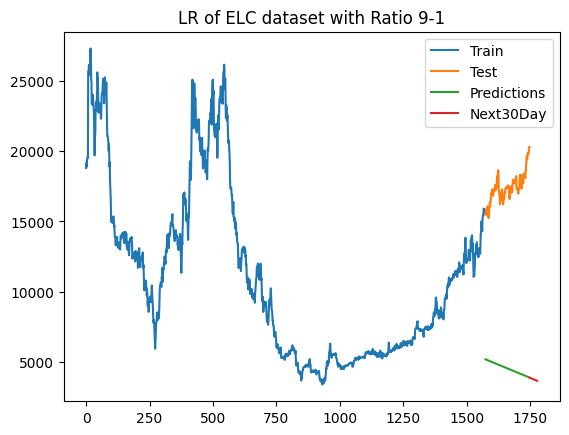

In [ ]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('LR of ELC dataset with Ratio 9-1')
plt.show()